In [2]:
import pandas as pd

# Load the file
file_path = "C:/Users/Tanuj/Downloads/ChIP_seq_Oligo/H3K27ac_adult.cov.table.xlsx"
data = pd.read_excel(file_path)

# View the first few rows and column information
print(data.head())
print(data.info())

  peak_coordinates_hg38  Adult_OPC1  Adult_OPC2  Adult_OPC3  Adult_OPC4  \
0    chr1_816793_819368         438         690         272         671   
1    chr1_826698_827752         168         344         144         515   
2   chr1_999939_1001238          44         241         218         164   
3  chr1_1012729_1015642         567        1332         883        1011   
4  chr1_1019230_1020262         166         187         120         345   

   Adult_OPC5  Adult_MO1  Adult_MO2  Adult_MO3  Adult_MO4  Adult_MO5  
0         214        246        385        189        444        144  
1          98        152        252        118        380         81  
2          84         34        122         32        130         39  
3         557         71        132         91        173         93  
4          87        185        206         94        325         97  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69372 entries, 0 to 69371
Data columns (total 11 columns):
 #   Column   

In [6]:
data.columns

Index(['peak_coordinates_hg38', 'Adult_OPC1', 'Adult_OPC2', 'Adult_OPC3',
       'Adult_OPC4', 'Adult_OPC5', 'Adult_MO1', 'Adult_MO2', 'Adult_MO3',
       'Adult_MO4', 'Adult_MO5'],
      dtype='object')

In [7]:
# Normalize coverage to Reads Per Million (RPM)
samples = data.columns[1:]  # All sample columns
data[samples] = data[samples].div(data[samples].sum(axis=0)) * 1e6

# View normalized data
print(data.head())

  peak_coordinates_hg38  Adult_OPC1  Adult_OPC2  Adult_OPC3  Adult_OPC4  \
0    chr1_816793_819368   17.896831   16.765801   12.943992   14.026632   
1    chr1_826698_827752    6.864538    8.358602    6.852702   10.765597   
2   chr1_999939_1001238    1.797855    5.855881   10.374229    3.428268   
3  chr1_1012729_1015642   23.167815   32.365285   42.020386   21.134017   
4  chr1_1019230_1020262    6.782817    4.543775    5.710585    7.211905   

   Adult_OPC5  Adult_MO1  Adult_MO2  Adult_MO3  Adult_MO4  Adult_MO5  
0   12.382135   9.808266   9.108002   8.524279   8.278764   6.992115  
1    5.670323   6.060392   5.961601   5.322037   7.085429   3.933065  
2    4.860277   1.355614   2.886172   1.443264   2.423962   1.893698  
3   32.228266   2.830841   3.122743   4.104283   3.225735   4.515741  
4    5.033858   7.376135   4.873372   4.239589   6.059906   4.709966  


In [8]:
from scipy.stats import ttest_ind
import numpy as np

# Split samples into groups
opc_samples = ['Adult_OPC1', 'Adult_OPC2', 'Adult_OPC3', 'Adult_OPC4', 'Adult_OPC5']
mo_samples = ['Adult_MO1', 'Adult_MO2', 'Adult_MO3', 'Adult_MO4', 'Adult_MO5']

# Calculate log2 fold changes and p-values
data['Log2FC'] = np.log2(data[mo_samples].mean(axis=1) / data[opc_samples].mean(axis=1))
t_stat, p_val = ttest_ind(data[opc_samples], data[mo_samples], axis=1)
data['p_value'] = p_val

# Filter DARs based on thresholds (FDR < 0.05, |Log2FC| > 1)
dar_threshold = 0.05
data['Significant'] = (data['p_value'] < dar_threshold) & (abs(data['Log2FC']) > 1)

# View DARs
dars = data[data['Significant']]
print(dars)

          peak_coordinates_hg38  Adult_OPC1  Adult_OPC2  Adult_OPC3  \
3          chr1_1012729_1015642   23.167815   32.365285   42.020386   
7          chr1_1098752_1101769    8.376371    1.214913    1.475234   
10         chr1_1124398_1125550    1.961297    0.753246    0.523470   
11         chr1_1153581_1154814    4.535498    0.899036    1.142117   
14         chr1_1208268_1209260    1.920436    1.409299    1.094529   
...                         ...         ...         ...         ...   
69318  chrX_154750403_154750995    2.574202    4.786758    3.473939   
69320  chrX_154778957_154779651    2.288179    1.214913    1.522823   
69323  chrX_154980782_154980950    1.430112    2.454124    2.093881   
69328  chrX_155106374_155107272    3.554850    3.717634    2.331822   
69331  chrX_155612121_155613160    7.395722   12.659394   11.659110   

       Adult_OPC4  Adult_OPC5  Adult_MO1  Adult_MO2  Adult_MO3  Adult_MO4  \
3       21.134017   32.228266   2.830841   3.122743   4.104283   3.225

In [ ]:
conda install -c bioconda gffread

In [ ]:
gffread gencode.v46.annotation.gtf -T -o gencode.hg38.gtf

In [ ]:
# Convert the peak coordinates to BED format
awk 'BEGIN {OFS="\t"} {print $1, $2, $3}' peaks.txt > peaks.bed

In [ ]:
# Annotate with bedtools closest
bedtools closest -a peaks.bed -b hg38.genes.bed -d > annotated_peaks.bed  

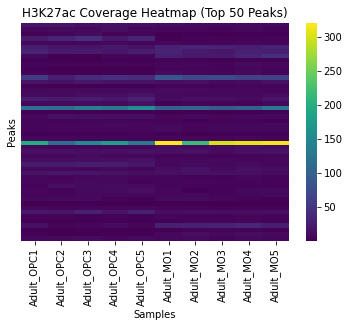

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of normalized data
sns.heatmap(data[samples].iloc[:50], cmap='viridis', xticklabels=True, yticklabels=False)
plt.title("H3K27ac Coverage Heatmap (Top 50 Peaks)")
plt.xlabel("Samples")
plt.ylabel("Peaks")
plt.show()

In [11]:
from gseapy import enrichr

# List of nearby genes for significant peaks
genes = dars['Gene_Symbol'].unique()

# Perform enrichment analysis
enrich_results = enrichr(gene_list=genes, gene_sets="KEGG_2019_Human")
print(enrich_results.results.head())

ModuleNotFoundError: No module named 'gseapy'

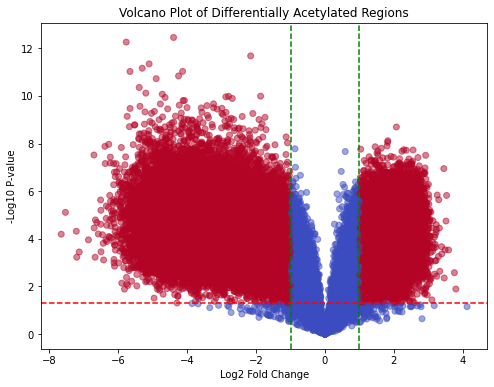

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a volcano plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Log2FC'], -np.log10(data['p_value']), c=data['Significant'], cmap='coolwarm', alpha=0.5)
plt.title("Volcano Plot of Differentially Acetylated Regions")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')  # P-value threshold (FDR < 0.05)
plt.axvline(x=1, color='g', linestyle='--')  # Log2FC threshold (|Log2FC| > 1)
plt.axvline(x=-1, color='g', linestyle='--')
plt.show()

In [ ]:
# Assuming you have RNA-seq data in a dataframe 'rna_seq_data' with genes as rows
# Example: Merge with RNA-seq data to correlate acetylation with gene expression

merged_data = data.loc[dars.index, ['Log2FC']]  # Log2FC of DARs
merged_data['RNASeq_Log2FC'] = rna_seq_data.loc[dars['Gene_ID'], 'Log2FC']  # Merge with RNA-seq data

# Plot correlation between acetylation and expression
plt.scatter(merged_data['Log2FC'], merged_data['RNASeq_Log2FC'])
plt.xlabel('H3K27ac Log2FC')
plt.ylabel('RNA-seq Log2FC')
plt.title('Correlation between H3K27ac and RNA-seq Expression')
plt.show()

In [ ]:
import pandas as pd
from pybedtools import BedTool

# Load H3K27ac data
h3k27ac_data = pd.read_excel("H3K27ac_adult.cov.table.xlsx")

In [ ]:
# Extract chromosome, start, and end
h3k27ac_data[['chromosome', 'start', 'end']] = h3k27ac_data['peak_coordinates_hg38'].str.split('_', expand=True)
h3k27ac_data['start'] = h3k27ac_data['start'].astype(int)
h3k27ac_data['end'] = h3k27ac_data['end'].astype(int)

In [ ]:
# Save to BED format
h3k27ac_bed = "h3k27ac.bed"
h3k27ac_data[['chromosome', 'start', 'end']].to_csv(h3k27ac_bed, sep='\t', header=False, index=False)

In [ ]:
# Convert GTF to BED
gtf_bed = "gencode_v46.bed"
with open(gtf_bed, 'w') as out_bed:
    with open("gencode.v46.annotation.gtf") as gtf:
        for line in gtf:
            if not line.startswith("#"):
                fields = line.strip().split('\t')
                chrom, start, end, strand, info = fields[0], fields[3], fields[4], fields[6], fields[8]
                feature = [chrom, start, end, info, ".", strand]
                out_bed.write("\t".join(feature) + "\n")

In [ ]:

# Annotate using bedtools
h3k27ac_bedtool = BedTool(h3k27ac_bed)
gtf_bedtool = BedTool(gtf_bed)
annotated = h3k27ac_bedtool.intersect(gtf_bedtool, wao=True)

# Save results
annotated.saveas("annotated_H3K27ac_Python.bed")

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [22]:
# Load the file
file_path = "C:/Users/Tanuj/Downloads/ChIP_seq_Oligo/H3K27ac_adult.cov.table.xlsx"
data = pd.read_excel(file_path)

# View the first few rows and column information
print(data.head())
print(data.info())

  peak_coordinates_hg38  Adult_OPC1  Adult_OPC2  Adult_OPC3  Adult_OPC4  \
0    chr1_816793_819368         438         690         272         671   
1    chr1_826698_827752         168         344         144         515   
2   chr1_999939_1001238          44         241         218         164   
3  chr1_1012729_1015642         567        1332         883        1011   
4  chr1_1019230_1020262         166         187         120         345   

   Adult_OPC5  Adult_MO1  Adult_MO2  Adult_MO3  Adult_MO4  Adult_MO5  
0         214        246        385        189        444        144  
1          98        152        252        118        380         81  
2          84         34        122         32        130         39  
3         557         71        132         91        173         93  
4          87        185        206         94        325         97  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69372 entries, 0 to 69371
Data columns (total 11 columns):
 #   Column   

In [23]:
# Normalize coverage to Reads Per Million (RPM)
samples = data.columns[1:]  # All sample columns
data[samples] = data[samples].div(data[samples].sum(axis=0)) * 1e6

# View normalized data
print(data.head())

  peak_coordinates_hg38  Adult_OPC1  Adult_OPC2  Adult_OPC3  Adult_OPC4  \
0    chr1_816793_819368   17.896831   16.765801   12.943992   14.026632   
1    chr1_826698_827752    6.864538    8.358602    6.852702   10.765597   
2   chr1_999939_1001238    1.797855    5.855881   10.374229    3.428268   
3  chr1_1012729_1015642   23.167815   32.365285   42.020386   21.134017   
4  chr1_1019230_1020262    6.782817    4.543775    5.710585    7.211905   

   Adult_OPC5  Adult_MO1  Adult_MO2  Adult_MO3  Adult_MO4  Adult_MO5  
0   12.382135   9.808266   9.108002   8.524279   8.278764   6.992115  
1    5.670323   6.060392   5.961601   5.322037   7.085429   3.933065  
2    4.860277   1.355614   2.886172   1.443264   2.423962   1.893698  
3   32.228266   2.830841   3.122743   4.104283   3.225735   4.515741  
4    5.033858   7.376135   4.873372   4.239589   6.059906   4.709966  


In [24]:
# Split samples into groups
opc_samples = ['Adult_OPC1', 'Adult_OPC2', 'Adult_OPC3', 'Adult_OPC4', 'Adult_OPC5']
mo_samples = ['Adult_MO1', 'Adult_MO2', 'Adult_MO3', 'Adult_MO4', 'Adult_MO5']

# Calculate log2 fold changes and p-values
data['Log2FC'] = np.log2(data[mo_samples].mean(axis=1) / data[opc_samples].mean(axis=1))
t_stat, p_val = ttest_ind(data[opc_samples], data[mo_samples], axis=1)
data['p_value'] = p_val

# Filter DARs based on thresholds (FDR < 0.05, |Log2FC| > 1)
dar_threshold = 0.05
data['Significant'] = (data['p_value'] < dar_threshold) & (abs(data['Log2FC']) > 1)

# View DARs
dars = data[data['Significant']]
print(dars)

          peak_coordinates_hg38  Adult_OPC1  Adult_OPC2  Adult_OPC3  \
3          chr1_1012729_1015642   23.167815   32.365285   42.020386   
7          chr1_1098752_1101769    8.376371    1.214913    1.475234   
10         chr1_1124398_1125550    1.961297    0.753246    0.523470   
11         chr1_1153581_1154814    4.535498    0.899036    1.142117   
14         chr1_1208268_1209260    1.920436    1.409299    1.094529   
...                         ...         ...         ...         ...   
69318  chrX_154750403_154750995    2.574202    4.786758    3.473939   
69320  chrX_154778957_154779651    2.288179    1.214913    1.522823   
69323  chrX_154980782_154980950    1.430112    2.454124    2.093881   
69328  chrX_155106374_155107272    3.554850    3.717634    2.331822   
69331  chrX_155612121_155613160    7.395722   12.659394   11.659110   

       Adult_OPC4  Adult_OPC5  Adult_MO1  Adult_MO2  Adult_MO3  Adult_MO4  \
3       21.134017   32.228266   2.830841   3.122743   4.104283   3.225

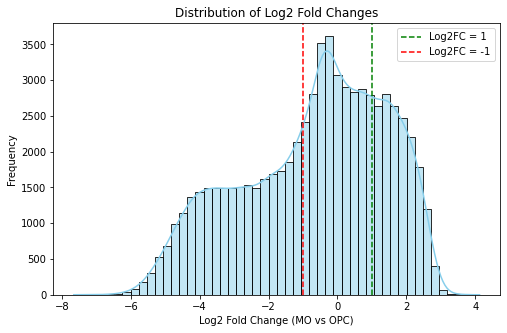

In [28]:
# Visualize distribution of Log2FC
plt.figure(figsize=(8, 5))
sns.histplot(data["Log2FC"], bins=50, kde=True, color="skyblue")
plt.axvline(x=1, color="green", linestyle="--", label="Log2FC = 1")
plt.axvline(x=-1, color="red", linestyle="--", label="Log2FC = -1")
plt.xlabel("Log2 Fold Change (MO vs OPC)")
plt.ylabel("Frequency")
plt.title("Distribution of Log2 Fold Changes")
plt.legend()
plt.savefig("C:/Users/Tanuj/Downloads/ChIP_seq_Oligo/Distribution of Log2 Fold Changes.png")
plt.show()

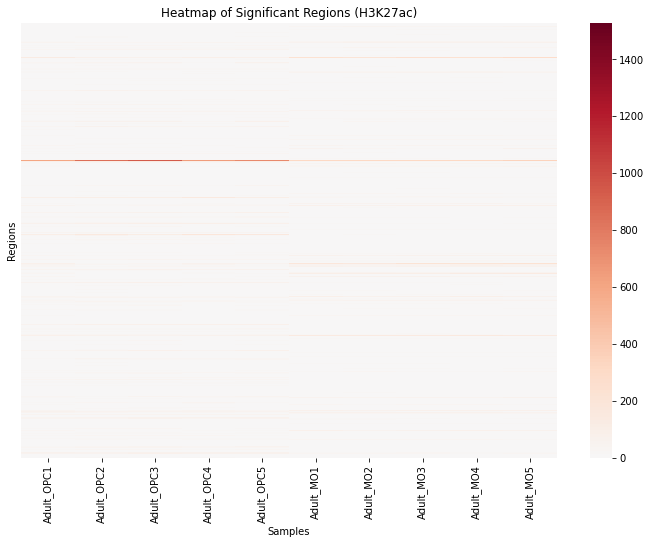

In [29]:
# Filter significant regions
significant_data = data[data["Significant"]]

# Prepare data for heatmap
heatmap_data = significant_data[opc_columns + mo_columns]

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="RdBu_r",
    center=0,
    xticklabels=True,
    yticklabels=False
)
plt.title("Heatmap of Significant Regions (H3K27ac)")
plt.xlabel("Samples")
plt.ylabel("Regions")
plt.savefig("C:/Users/Tanuj/Downloads/ChIP_seq_Oligo/Heatmap of Significant Regions (H3K27ac).png")
plt.show()

In [33]:
# Calculate MO and OPC mean signals
data["MO_mean"] = data[mo_columns].mean(axis=1)
data["OPC_mean"] = data[opc_columns].mean(axis=1)

# Verify the newly added columns
print(data[["MO_mean", "OPC_mean"]].head())

    MO_mean   OPC_mean
0  8.542285  14.803078
1  5.672505   7.702352
2  2.000542   5.263302
3  3.559869  30.183154
4  5.451794   5.856588


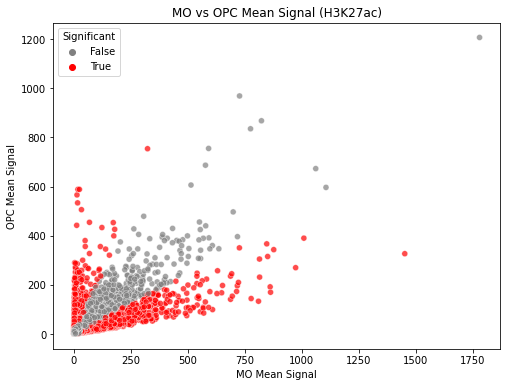

In [36]:
# Scatterplot: MO mean vs OPC mean
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data["MO_mean"],
    y=data["OPC_mean"],
    hue=data["Significant"],
    palette={True: "red", False: "gray"},
    alpha=0.7
)
plt.xlabel("MO Mean Signal")
plt.ylabel("OPC Mean Signal")
plt.title("MO vs OPC Mean Signal (H3K27ac)")
plt.legend(title="Significant")
plt.savefig("C:/Users/Tanuj/Downloads/ChIP_seq_Oligo/MO vs OPC Mean Signal (H3K27ac).png")
plt.show()

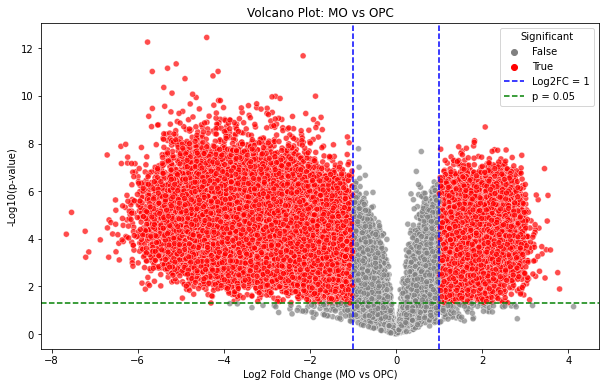

In [39]:
# Volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data["Log2FC"],
    y=-np.log10(data["p_value"]),
    hue=data["Significant"],
    palette={True: "red", False: "gray"},
    alpha=0.7
)
plt.axvline(x=1, color="blue", linestyle="--", label="Log2FC = 1")
plt.axvline(x=-1, color="blue", linestyle="--")
plt.axhline(y=-np.log10(0.05), color="green", linestyle="--", label="p = 0.05")
plt.xlabel("Log2 Fold Change (MO vs OPC)")
plt.ylabel("-Log10(p-value)")
plt.title("Volcano Plot: MO vs OPC")
plt.legend(title="Significant")
plt.savefig("C:/Users/Tanuj/Downloads/ChIP_seq_Oligo/Volcano Plot MO vs OPC.png")
plt.show()

In [32]:
# Save significant regions to a CSV file
significant_data.to_csv("C:/Users/Tanuj/Downloads/ChIP_seq_Oligo/Significant_DARs.csv", index=False)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load processed data
data = pd.read_csv("H3K27ac_analysis_results.csv")

# Filter significant peaks
significant_peaks = data[data["significant"]]

# Save BED file for annotation
significant_peaks_bed = "significant_peaks.bed"
significant_peaks[["peak_coordinates_hg38"]].to_csv(
    significant_peaks_bed, sep="\t", header=False, index=False
)

# Annotate with BEDTools (command-line integration example)
# !bedtools intersect -a significant_peaks.bed -b gencode.v46.annotation.gtf > annotated_peaks.bed

# Hierarchical Clustering of Significant Peaks
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract normalized signals
norm_signals = significant_peaks.filter(like="Adult_")
row_labels = significant_peaks["peak_coordinates_hg38"]

# Scale data
scaler = StandardScaler()
norm_signals_scaled = scaler.fit_transform(norm_signals)

# Perform hierarchical clustering
linkage_matrix = linkage(norm_signals_scaled, method="ward")
sns.clustermap(
    norm_signals_scaled,
    row_cluster=True,
    col_cluster=True,
    cmap="vlag",
    row_linkage=linkage_matrix,
    yticklabels=row_labels,
)
plt.title("Clustering of Significant Peaks")
plt.savefig("clustering_significant_peaks.png")
plt.show()

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_results = pca.fit_transform(norm_signals_scaled)
explained_var = pca.explained_variance_ratio_

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=significant_peaks["significant"])
plt.title(f"PCA of Significant Peaks (Explained Variance: {explained_var[:2].sum():.2f})")
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.savefig("pca_significant_peaks.png")
plt.show()